In [15]:
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
MODELS_FOLDER = "saved_models"
EPOCHS = 9

In [2]:
f = open(MODELS_FOLDER+"/history2.json", "r")
history = json.load(f)
f.close()

In [43]:
history_vis = {}
for lr, stat_d in history["0"].items():
    history_vis[lr] = {}
    for stat, val in stat_d.items():
        arr = np.array([history[str(x)][lr][stat] for x in range(EPOCHS)])
        history_vis[lr][stat] = {}
        history_vis[lr][stat]["mean"] = np.mean(arr, axis=0)
        history_vis[lr][stat]["std"] = np.std(arr, axis=0)

In [44]:
del history_vis['0.1']

In [45]:
def plot_print(stat):
    sns.set()
    x = list(range(EPOCHS))

    for rl, stat_d in history_vis.items():
        d = stat_d[stat]
        plt.plot(x, d["mean"], label=rl)
        plt.fill_between(x, d["mean"] - d["std"], d["mean"] + d["std"], alpha=0.2)

    plt.legend(title=stat)
    plt.show()

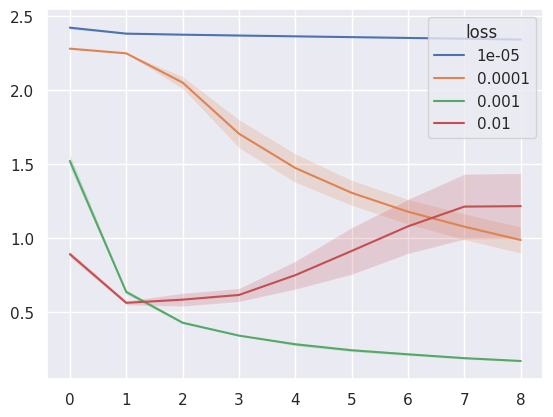

In [46]:
plot_print("loss")

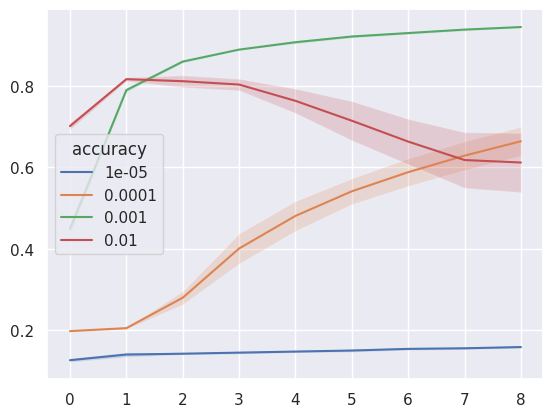

In [47]:
plot_print("accuracy")

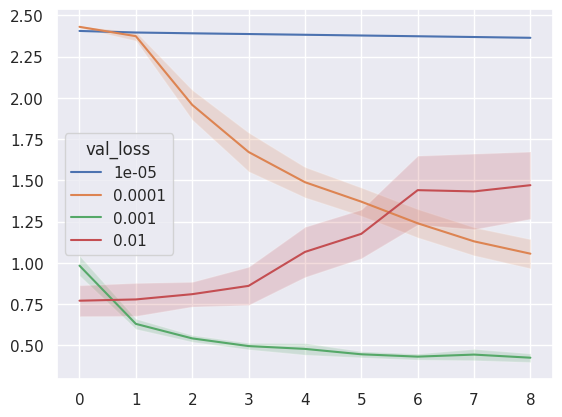

In [48]:
plot_print("val_loss")

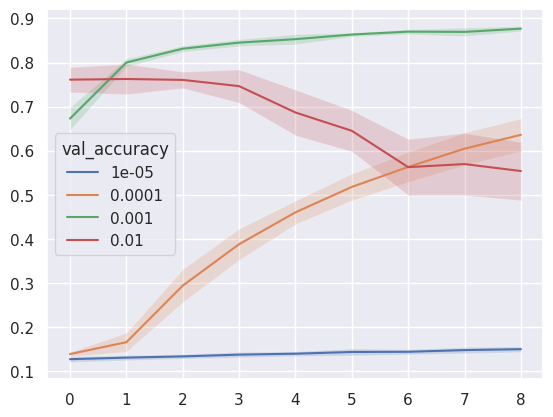

In [49]:
plot_print("val_accuracy")